<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Machine Learning Final Project: Question 2</h1>**

## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, BaggingClassifier
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis and Wrangling

## `Read data`

In [213]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

## `Get sample`

In [49]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12244,60,self-employed,married,secondary,no,17339,no,no,unknown,20,jun,50,11,-1,0,unknown,no
20869,50,management,married,tertiary,no,400,no,no,cellular,13,aug,343,2,-1,0,unknown,no
5502,38,blue-collar,single,primary,no,1375,yes,no,unknown,23,may,83,3,-1,0,unknown,no
2773,48,blue-collar,married,primary,no,5154,yes,no,unknown,14,may,70,1,-1,0,unknown,no
15973,42,entrepreneur,married,secondary,no,2239,yes,no,cellular,22,jul,176,1,-1,0,unknown,no
17127,37,blue-collar,married,secondary,no,236,no,no,cellular,25,jul,438,6,-1,0,unknown,no
39494,55,retired,married,secondary,no,393,no,yes,cellular,25,may,176,1,-1,0,unknown,no
6645,46,technician,married,secondary,no,317,yes,yes,unknown,28,may,125,1,-1,0,unknown,no
11793,55,services,divorced,secondary,no,1735,no,no,unknown,20,jun,375,2,-1,0,unknown,no
18208,41,admin.,married,secondary,no,1705,no,no,cellular,30,jul,92,3,-1,0,unknown,no


In [50]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3148,36,admin.,single,secondary,no,1927,yes,no,cellular,18,nov,288,1,137,1,other,no
926,38,admin.,married,primary,no,3913,yes,no,cellular,20,apr,196,2,315,2,failure,no
414,53,blue-collar,married,secondary,no,4380,no,no,telephone,19,aug,223,7,-1,0,unknown,no
2108,46,blue-collar,divorced,primary,no,452,yes,no,unknown,9,may,113,4,-1,0,unknown,no
1843,39,services,married,secondary,no,247,yes,no,cellular,17,apr,244,2,-1,0,unknown,no
1910,54,retired,married,secondary,no,1139,yes,no,cellular,14,may,155,1,177,7,failure,no
528,43,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
2027,38,blue-collar,single,primary,no,490,yes,yes,unknown,25,aug,17,1,-1,0,unknown,no
1339,40,technician,single,tertiary,no,226,no,no,cellular,15,jan,176,2,-1,0,unknown,no
91,34,blue-collar,married,primary,no,455,yes,no,unknown,20,jun,372,3,-1,0,unknown,no


## `Get data informaion`

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Statistical analysis on data and Visualization

## `1. Overview statistics`

In [52]:
train_df.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


## `2. Correlation Matrix`

Text(0.5, 1.0, 'Data correlations')

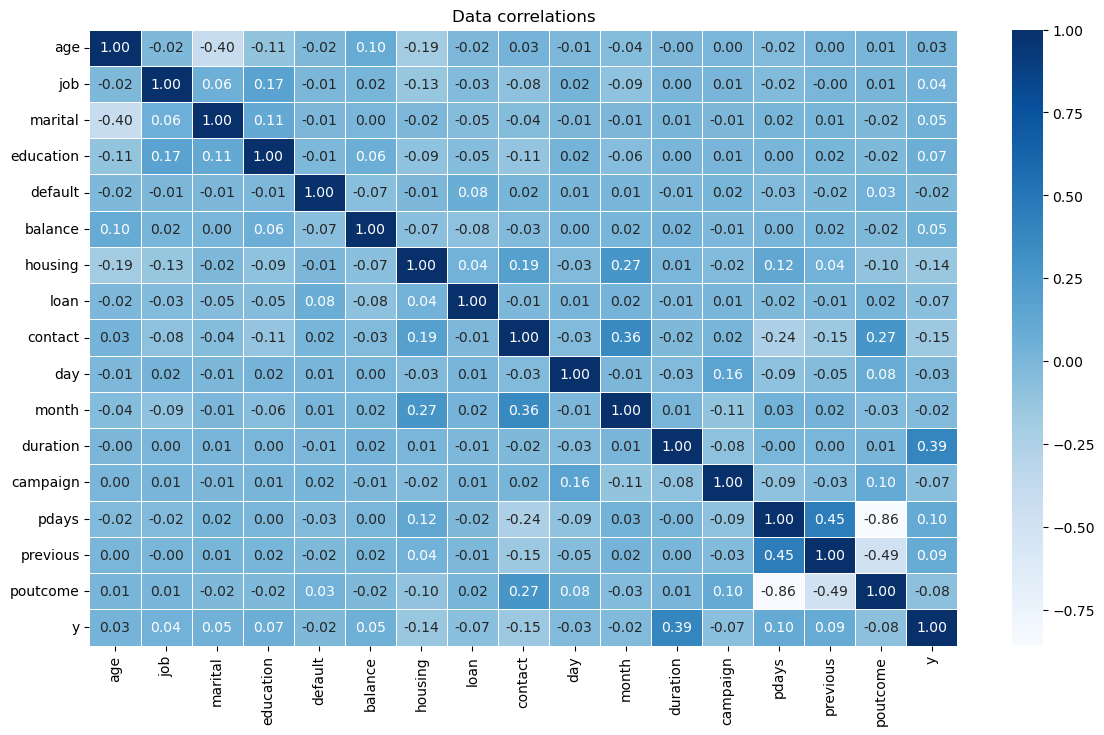

In [53]:
encoded_train = train_df.copy()

for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_train[column] = label_encoder.fit_transform(encoded_train[column])

correlation = encoded_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

## `3. Chart Box`

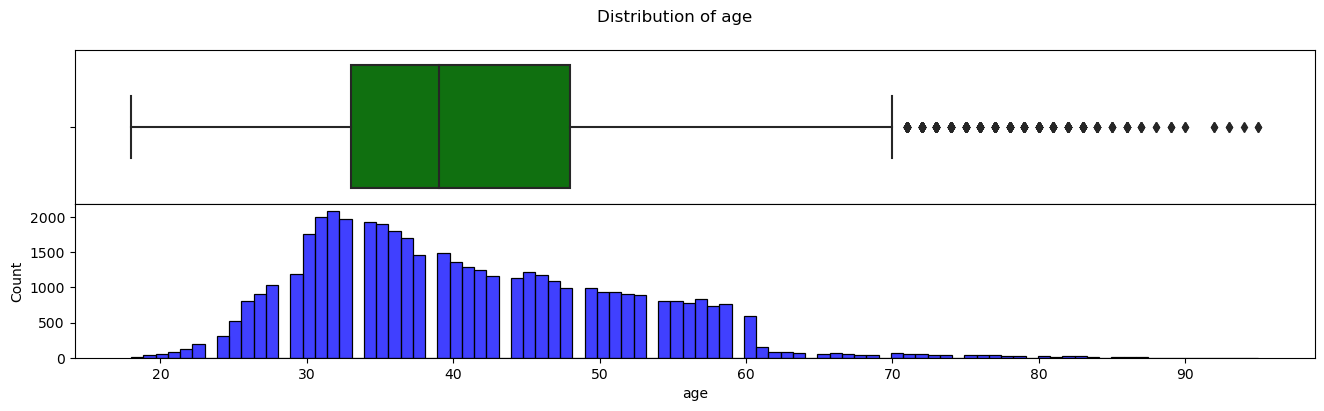

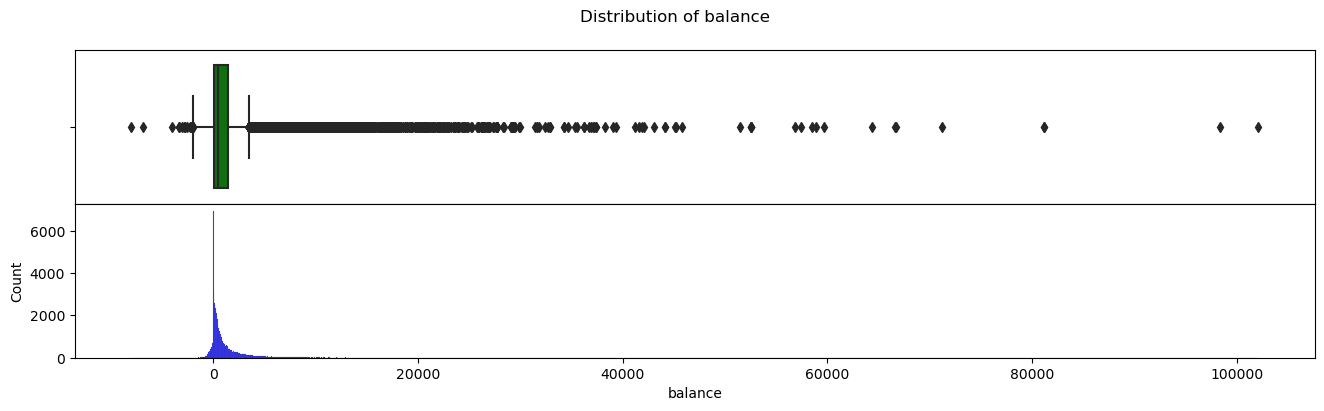

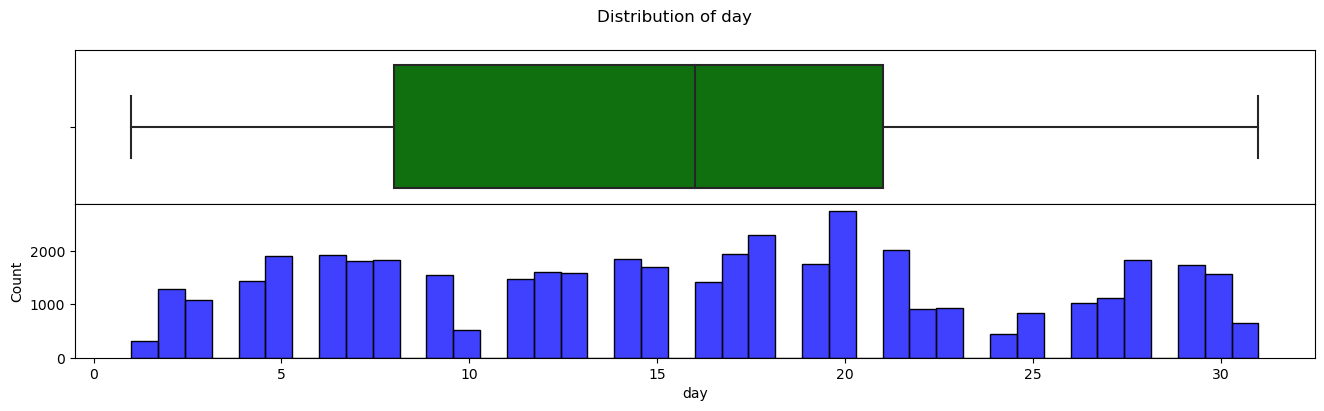

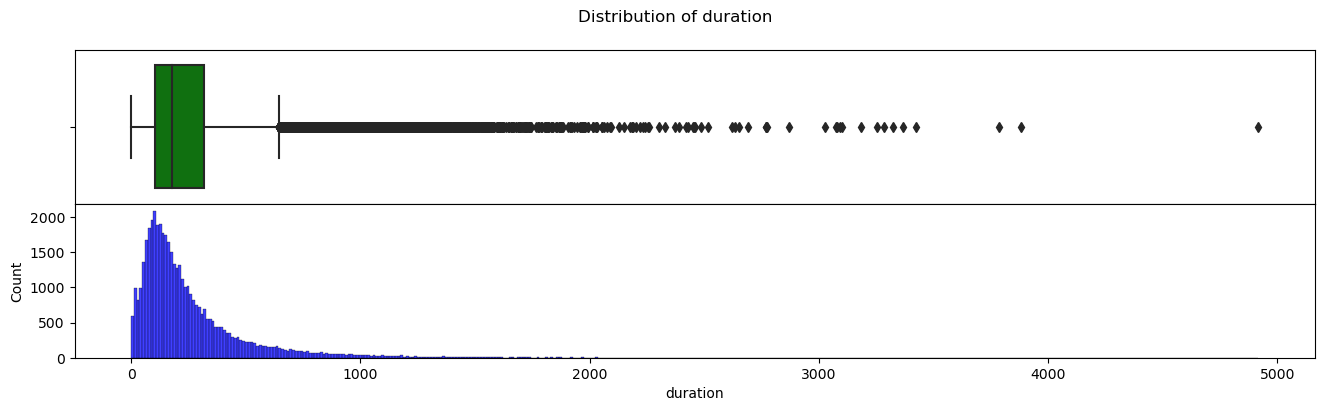

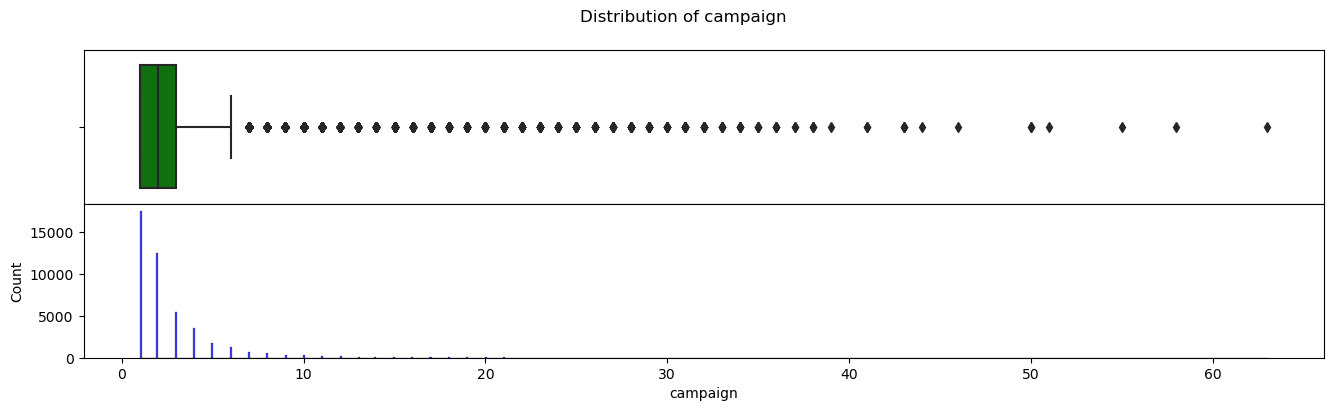

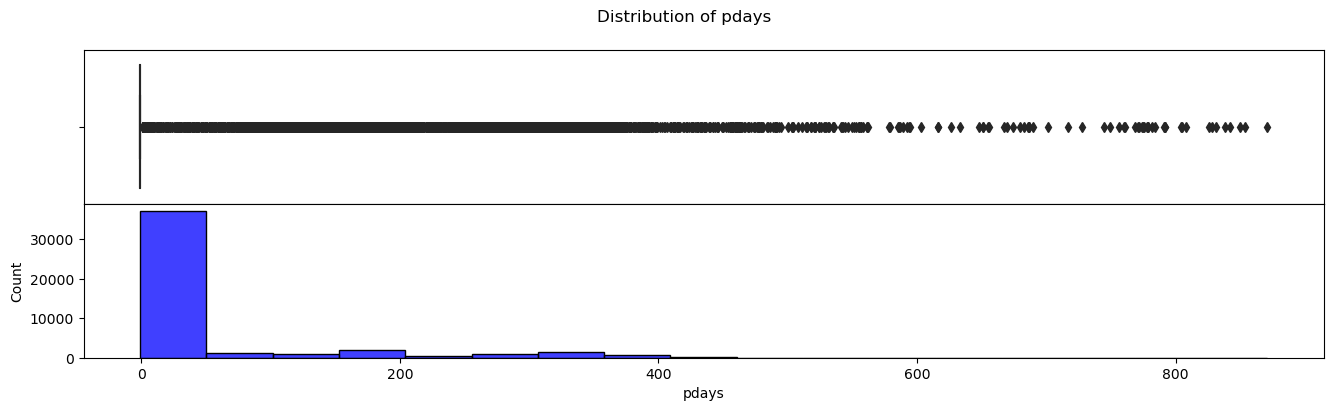

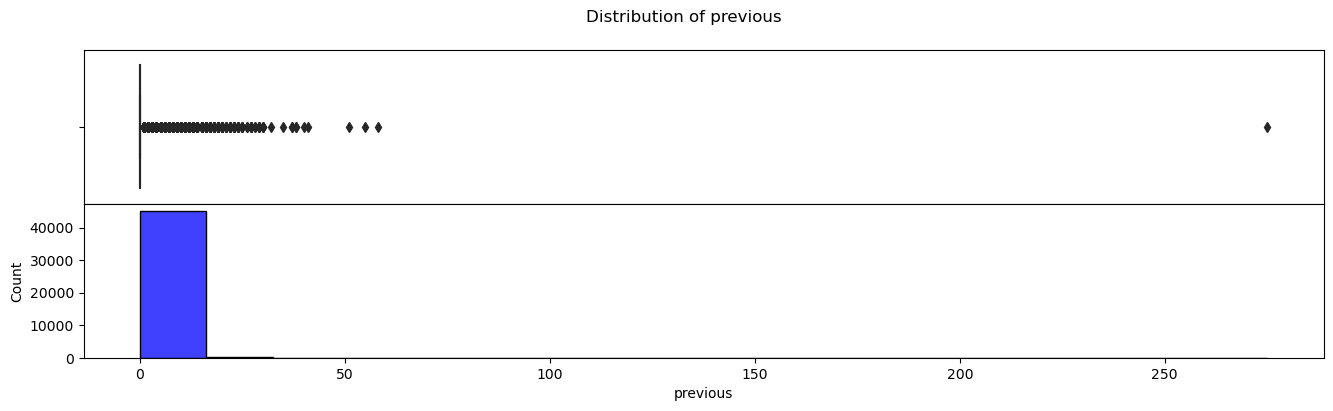

In [54]:
numerical = train_df.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=train_df, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=train_df, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

## `4. Target class imbalance`

Count of each Status:
no     39922
yes     5289
Name: y, dtype: int64



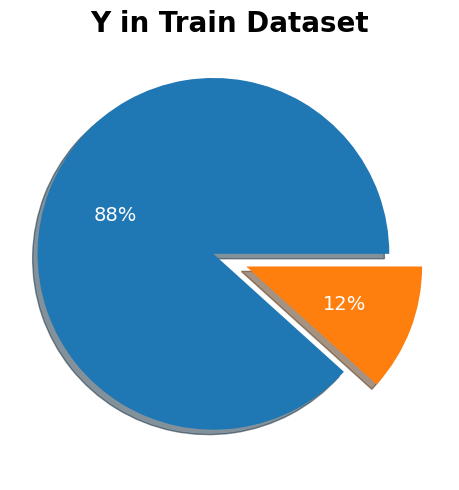

In [55]:
status_counts = train_df['y'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    train_df['y'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(train_df['y'].nunique())],
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)
ax.set_title('Y in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

# Data preprocessing

## `1 Data encoding`

In [214]:
train_df = pd.get_dummies(train_df, columns=['education'])

In [215]:
test_df = pd.get_dummies(test_df, columns=['education'])

In [216]:
le = LabelEncoder()
train_df = train_df.apply(le.fit_transform)
train_df

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown
0,40,4,1,0,3036,1,0,2,4,8,261,0,0,0,3,0,0,0,1,0
1,26,9,2,0,945,1,0,2,4,8,151,0,0,0,3,0,0,1,0,0
2,15,2,1,0,918,1,1,2,4,8,76,0,0,0,3,0,0,1,0,0
3,29,1,1,0,2420,1,0,2,4,8,92,0,0,0,3,0,0,0,0,1
4,15,11,2,0,917,0,0,2,4,8,198,0,0,0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,0,1741,0,0,0,16,9,975,2,0,0,3,1,0,0,1,0
45207,53,5,0,0,2639,0,0,0,16,9,456,1,0,0,3,1,1,0,0,0
45208,54,5,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1,0,1,0,0
45209,39,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0,0,1,0,0


In [217]:
test_df = test_df.apply(le.fit_transform)
test_df

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown
0,11,10,1,0,1475,0,0,0,18,10,75,0,0,0,3,0,1,0,0,0
1,14,7,1,0,2030,1,1,0,10,8,216,0,228,4,0,0,0,1,0,0
2,16,4,2,0,1303,1,0,0,15,0,181,0,219,1,0,0,0,0,1,0
3,11,4,1,0,1352,1,1,2,2,6,195,3,0,0,3,0,0,0,1,0
4,40,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,0,119,1,0,0,29,5,325,4,0,0,3,0,0,1,0,0
4517,38,6,1,1,0,1,1,2,8,8,149,0,0,0,3,0,0,0,1,0
4518,38,9,1,0,558,0,0,0,18,1,147,10,0,0,3,0,0,1,0,0
4519,9,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0,0,1,0,0


In [218]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale=scaler.fit_transform(train_df)
scale=scaler.fit_transform(test_df)

## `2 Data Splitting`

In [219]:
X_train = train_df.drop(columns=['y'], axis =1)
y_train = train_df['y']

X_test = test_df.drop(columns=['y'], axis =1)
y_test = test_df['y']

In [220]:
X_train

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_primary,education_secondary,education_tertiary,education_unknown
0,40,4,1,0,3036,1,0,2,4,8,261,0,0,0,3,0,0,1,0
1,26,9,2,0,945,1,0,2,4,8,151,0,0,0,3,0,1,0,0
2,15,2,1,0,918,1,1,2,4,8,76,0,0,0,3,0,1,0,0
3,29,1,1,0,2420,1,0,2,4,8,92,0,0,0,3,0,0,0,1
4,15,11,2,0,917,0,0,2,4,8,198,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,0,1741,0,0,0,16,9,975,2,0,0,3,0,0,1,0
45207,53,5,0,0,2639,0,0,0,16,9,456,1,0,0,3,1,0,0,0
45208,54,5,1,0,5455,0,0,0,16,9,1116,4,181,3,2,0,1,0,0
45209,39,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0,1,0,0


In [222]:
X_test

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,education_primary,education_secondary,education_tertiary,education_unknown
0,11,10,1,0,1475,0,0,0,18,10,75,0,0,0,3,1,0,0,0
1,14,7,1,0,2030,1,1,0,10,8,216,0,228,4,0,0,1,0,0
2,16,4,2,0,1303,1,0,0,15,0,181,0,219,1,0,0,0,1,0
3,11,4,1,0,1352,1,1,2,2,6,195,3,0,0,3,0,0,1,0
4,40,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,0,119,1,0,0,29,5,325,4,0,0,3,0,1,0,0
4517,38,6,1,1,0,1,1,2,8,8,149,0,0,0,3,0,0,1,0
4518,38,9,1,0,558,0,0,0,18,1,147,10,0,0,3,0,1,0,0
4519,9,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0,1,0,0


# Basic Model

In [167]:
def make_confusion_matrix(cm):
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    axe = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=True, annot_kws={'fontsize': 12})
    axe.set(xlabel="Predict", ylabel="Actual")

## `Logistic Regression`

In [39]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

Accuracy of KNN 0.8809997788099978
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      4000
           1       0.43      0.10      0.16       521

    accuracy                           0.88      4521
   macro avg       0.66      0.54      0.55      4521
weighted avg       0.84      0.88      0.85      4521



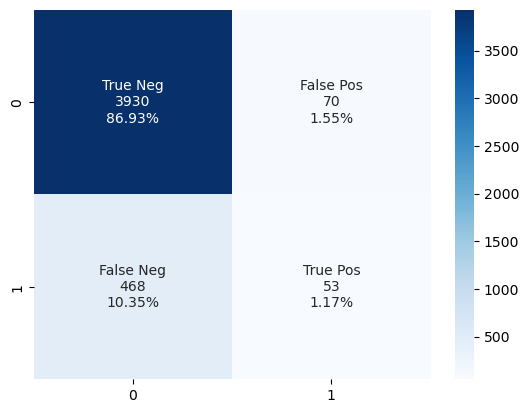

In [18]:
y_LR_pred = LR.predict(X_test)
accuracy_LR_before_improve = accuracy_score(y_test, y_LR_pred)
print("Accuracy of KNN",accuracy_LR_before_improve)
print(classification_report(y_test, y_LR_pred))
make_confusion_matrix (confusion_matrix(y_test, y_LR_pred))

## `KNN`

In [223]:
KNN = KNeighborsClassifier(n_neighbors=7, p=2)
KNN.fit(X_train, y_train)

(45211,)

Accuracy of KNN 0.8823269188232692
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.47      0.15      0.23       521

    accuracy                           0.88      4521
   macro avg       0.68      0.56      0.58      4521
weighted avg       0.85      0.88      0.85      4521



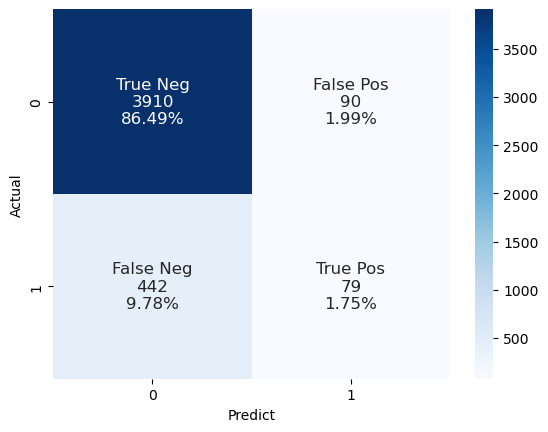

In [224]:
y_KNN_pred = KNN.predict(X_test.values)
accuracy_KNN_before_improve = accuracy_score(y_test, y_KNN_pred)
print("Accuracy of KNN",accuracy_KNN_before_improve)
print(classification_report(y_test, y_KNN_pred))
make_confusion_matrix (confusion_matrix(y_test, y_KNN_pred))

## `Decision Trree`

In [225]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy of Decision Trree 0.8980314089803141
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4000
           1       0.56      0.55      0.56       521

    accuracy                           0.90      4521
   macro avg       0.75      0.75      0.75      4521
weighted avg       0.90      0.90      0.90      4521



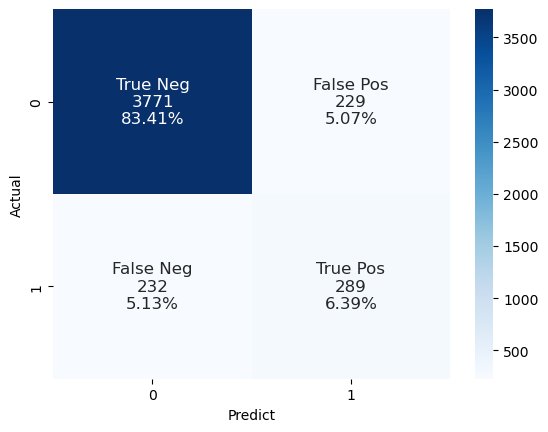

In [226]:
y_DT_pred = DT.predict(X_test.values)
accuracy_DT_before_improve = accuracy_score(y_test, y_DT_pred)
print("Accuracy of Decision Trree",accuracy_DT_before_improve)
print(classification_report(y_test, y_DT_pred))
make_confusion_matrix (confusion_matrix(y_test, y_DT_pred))

## `Naive Bayes`

In [227]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

Accuracy of Naive Bayes 0.8980314089803141
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4000
           1       0.56      0.55      0.56       521

    accuracy                           0.90      4521
   macro avg       0.75      0.75      0.75      4521
weighted avg       0.90      0.90      0.90      4521



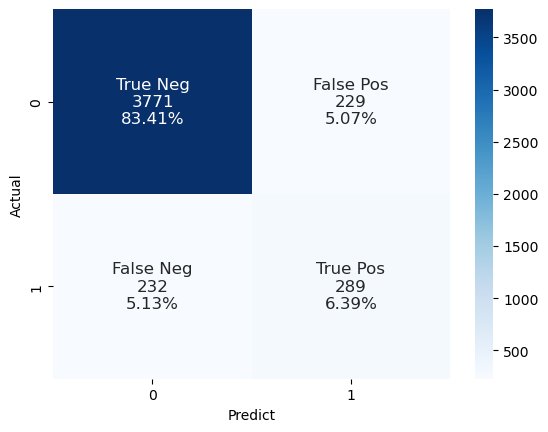

In [228]:
y_GNB_pred = DT.predict(X_test.values)
accuracy_GNB_before_improve = accuracy_score(y_test, y_GNB_pred)
print("Accuracy of Naive Bayes",accuracy_GNB_before_improve)
print(classification_report(y_test, y_GNB_pred))
make_confusion_matrix (confusion_matrix(y_test, y_GNB_pred))

## `SVM`

In [311]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

Accuracy of SVM 0.8847600088476001
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



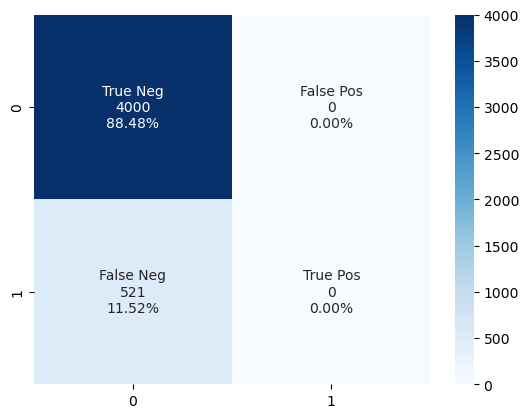

In [327]:
y_svm_pred=svm.predict(X_test)
accuracy_svm_before_improve = accuracy_score(y_test, y_svm_pred)
print("Accuracy of SVM",accuracy_svm_before_improve)
print(classification_report(y_test, y_svm_pred))
make_confusion_matrix (confusion_matrix(y_test, y_svm_pred))

## `Perceptron`

In [229]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

Accuracy of Perceptron 0.8398584383985844
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4000
           1       0.35      0.46      0.40       521

    accuracy                           0.84      4521
   macro avg       0.64      0.68      0.65      4521
weighted avg       0.86      0.84      0.85      4521



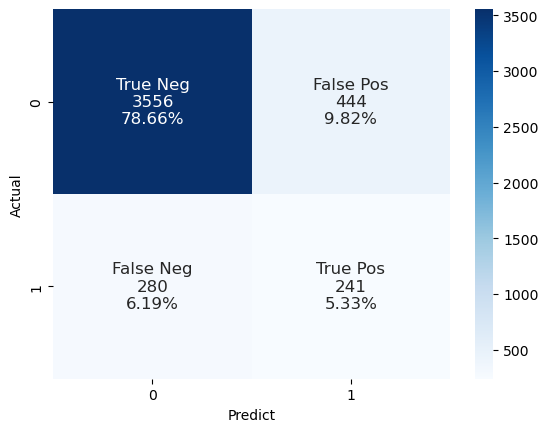

In [230]:
y_perceptron_pred=perceptron.predict(X_test)
accuracy_perceptron_before_improve = accuracy_score(y_test, y_perceptron_pred)
print("Accuracy of Perceptron",accuracy_perceptron_before_improve)
print(classification_report(y_test, y_perceptron_pred))
make_confusion_matrix (confusion_matrix(y_test, y_perceptron_pred))

# Ensemble Learing

## `Bagging`

In [231]:
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42)

Accuracy of Bagging 0.8845388188453882
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.50      0.16      0.24       521

    accuracy                           0.88      4521
   macro avg       0.70      0.57      0.59      4521
weighted avg       0.85      0.88      0.86      4521



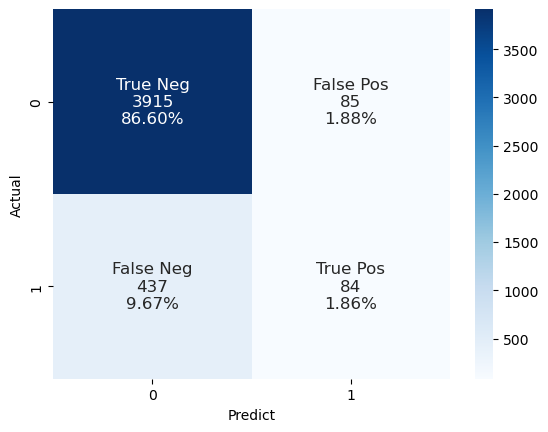

In [232]:
y_bagging_pred = bagging.predict(X_test)
accuracy_bagging_before_improve = accuracy_score(y_test, y_bagging_pred)
print("Accuracy of Bagging",accuracy_bagging_before_improve)
print(classification_report(y_test, y_bagging_pred))
make_confusion_matrix (confusion_matrix(y_test, y_bagging_pred))

## `Voting`

In [278]:
voting = VotingClassifier(estimators=[('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier()), ('logreg', LogisticRegression())], voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('logreg', LogisticRegression())])

Accuracy of Voting 0.8845388188453882
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.50      0.16      0.24       521

    accuracy                           0.88      4521
   macro avg       0.70      0.57      0.59      4521
weighted avg       0.85      0.88      0.86      4521



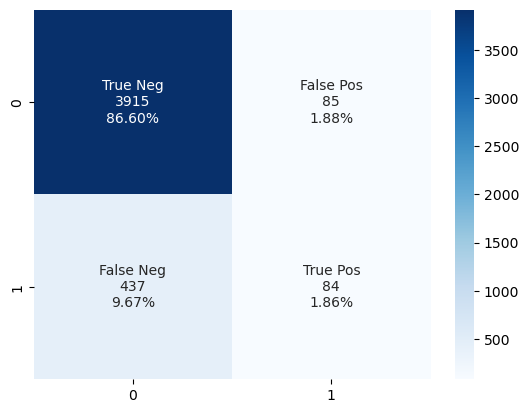

In [324]:
y_voting_pred = bagging.predict(X_test)
accuracy_voting_before_improve = accuracy_score(y_test, y_voting_pred)
print("Accuracy of Voting",accuracy_voting_before_improve)
print(classification_report(y_test, y_voting_pred))
make_confusion_matrix (confusion_matrix(y_test, y_voting_pred))

## `Stacking`

In [280]:
stacking = StackingClassifier(estimators=[('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier())], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('ada', AdaBoostClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

Accuracy of Stacking 0.8847600088476001
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



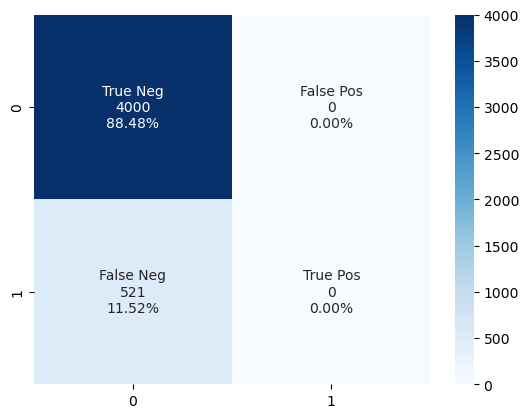

In [323]:
y_stacking_pred = stacking.predict(X_test)
accuracy_stacking_before_improve = accuracy_score(y_test, y_stacking_pred)
print("Accuracy of Stacking",accuracy_stacking_before_improve)
print(classification_report(y_test, y_stacking_pred))
make_confusion_matrix (confusion_matrix(y_test, y_stacking_pred))

## `Random Forest`

In [282]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy of Random Forest 0.9312099093120991
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4000
           1       0.87      0.47      0.61       521

    accuracy                           0.93      4521
   macro avg       0.90      0.73      0.79      4521
weighted avg       0.93      0.93      0.92      4521



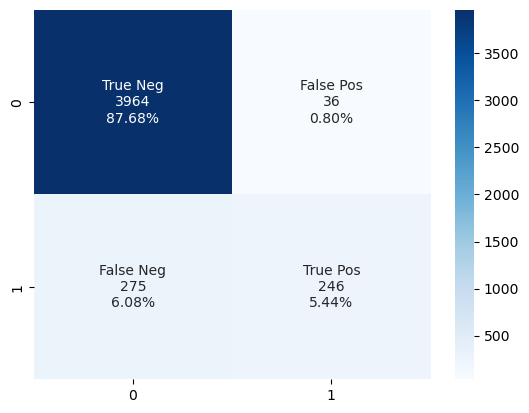

In [322]:
y_RF_pred = RF.predict(X_test)
accuracy_RF_before_improve = accuracy_score(y_test, y_RF_pred)
print("Accuracy of Random Forest",accuracy_RF_before_improve)
print(classification_report(y_test, y_RF_pred))
make_confusion_matrix (confusion_matrix(y_test, y_RF_pred))

## `Gradient Boosting`

In [284]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy of Gradient Boosting 0.8962618889626189
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4000
           1       0.64      0.22      0.33       521

    accuracy                           0.90      4521
   macro avg       0.77      0.60      0.64      4521
weighted avg       0.88      0.90      0.87      4521



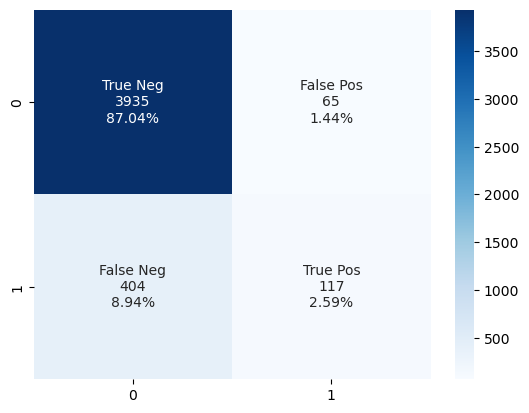

In [321]:
y_GB_pred = GB.predict(X_test)
accuracy_GB_before_improve = accuracy_score(y_test, y_GB_pred)
print("Accuracy of Gradient Boosting",accuracy_GB_before_improve)
print(classification_report(y_test, y_GB_pred))
make_confusion_matrix (confusion_matrix(y_test, y_GB_pred))

## `Adaboost`

In [286]:
ADA = AdaBoostClassifier(n_estimators=50)
ADA.fit(X_train, y_train)

AdaBoostClassifier()

Accuracy of Adaboost 0.8909533289095333
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4000
           1       0.57      0.21      0.31       521

    accuracy                           0.89      4521
   macro avg       0.74      0.60      0.63      4521
weighted avg       0.87      0.89      0.87      4521



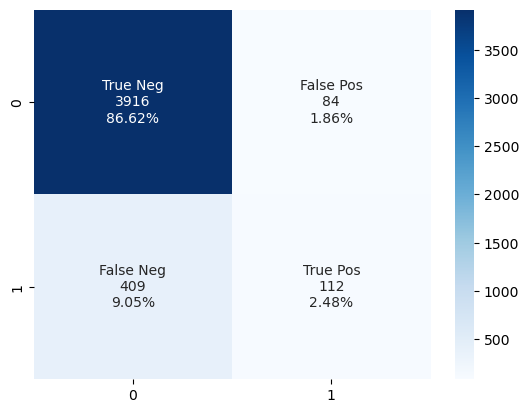

In [330]:
y_ADA_pred = ADA.predict(X_test)
accuracy_ADA_before_improve = accuracy_score(y_test, y_ADA_pred)
print("Accuracy of Adaboost",accuracy_ADA_before_improve)
print(classification_report(y_test, y_ADA_pred))
make_confusion_matrix (confusion_matrix(y_test, y_ADA_pred))

## `XGBoost`

In [332]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy of XGBoost 0.9128511391285113
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4000
           1       0.70      0.42      0.53       521

    accuracy                           0.91      4521
   macro avg       0.82      0.70      0.74      4521
weighted avg       0.90      0.91      0.90      4521



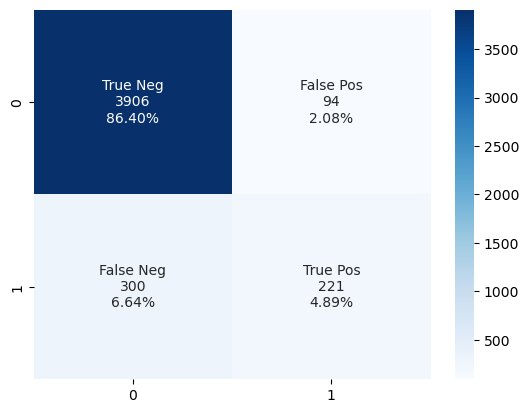

In [333]:
y_xgb_pred = xgb.predict(X_test)
accuracy_xgb_before_improve = accuracy_score(y_test, y_xgb_pred)
print("Accuracy of XGBoost",accuracy_xgb_before_improve)
print(classification_report(y_test, y_xgb_pred))
make_confusion_matrix (confusion_matrix(y_test, y_xgb_pred))

## `LightGBM`

In [290]:
LGB = lgb.LGBMClassifier(random_state=42)
LGB.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5289, number of negative: 39922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 45211, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116985 -> initscore=-2.021298
[LightGBM] [Info] Start training from score -2.021298


LGBMClassifier(random_state=42)

Accuracy of LightGBM 0.907100199071002
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.71      0.32      0.44       521

    accuracy                           0.91      4521
   macro avg       0.82      0.65      0.70      4521
weighted avg       0.89      0.91      0.89      4521



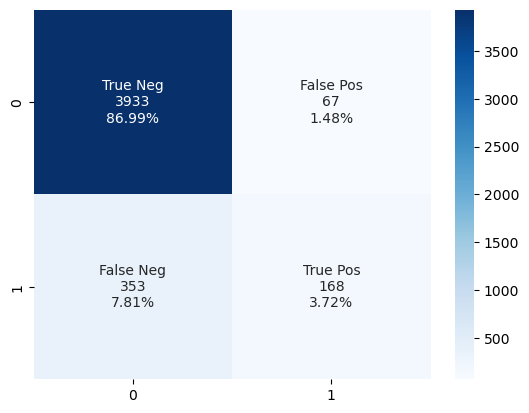

In [334]:
y_LGB_pred = LGB.predict(X_test)
accuracy_LGB_before_improve = accuracy_score(y_test, y_LGB_pred)
print("Accuracy of LightGBM",accuracy_LGB_before_improve)
print(classification_report(y_test, y_LGB_pred))
make_confusion_matrix (confusion_matrix(y_test, y_LGB_pred))

# Feed Forward Neural Network

In [299]:
model_ffnn = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [300]:
model_ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
2826/2826 [==============================] - 6s 2ms/step - loss: 1.4418 - accuracy: 0.8383
Epoch 2/10
2826/2826 [==============================] - 6s 2ms/step - loss: 1.0395 - accuracy: 0.8478
Epoch 3/10
2826/2826 [==============================] - 6s 2ms/step - loss: 0.9207 - accuracy: 0.8523
Epoch 4/10
2826/2826 [==============================] - 6s 2ms/step - loss: 0.8151 - accuracy: 0.8534
Epoch 5/10
2826/2826 [==============================] - 6s 2ms/step - loss: 0.7907 - accuracy: 0.8559
Epoch 6/10
2826/2826 [==============================] - 6s 2ms/step - loss: 0.6578 - accuracy: 0.8604
Epoch 7/10
2826/2826 [==============================] - 6s 2ms/step - loss: 0.5855 - accuracy: 0.8627
Epoch 8/10
2826/2826 [==============================] - 7s 2ms/step - loss: 0.5345 - accuracy: 0.8660
Epoch 9/10
2826/2826 [==============================] - 6s 2ms/step - loss: 0.4939 - accuracy: 0.8679
Epoch 10/10
2826/2826 [==============================] - 5s 2ms/step - loss: 0.428

In [301]:
loss, accuracy = model_ffnn.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

142/142 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8730
Test Loss: 0.31869590282440186
Test Accuracy: 0.8730369210243225


# Reccurent Neural Network

In [303]:
model_rnn = Sequential([
    Embedding(input_dim=X_train.max().max()+1, output_dim=17, input_length=X_train.shape[1]),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

In [304]:
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
2826/2826 [==============================] - 29s 9ms/step - loss: 0.3080 - accuracy: 0.8895
Epoch 2/10
2826/2826 [==============================] - 21s 7ms/step - loss: 0.2473 - accuracy: 0.9004
Epoch 3/10
2826/2826 [==============================] - 26s 9ms/step - loss: 0.2171 - accuracy: 0.9100
Epoch 4/10
2826/2826 [==============================] - 37s 13ms/step - loss: 0.1963 - accuracy: 0.9194
Epoch 5/10
2826/2826 [==============================] - 36s 13ms/step - loss: 0.1807 - accuracy: 0.9257
Epoch 6/10
2826/2826 [==============================] - 36s 13ms/step - loss: 0.1668 - accuracy: 0.9310
Epoch 7/10
2826/2826 [==============================] - 38s 13ms/step - loss: 0.1535 - accuracy: 0.9359
Epoch 8/10
2826/2826 [==============================] - 44s 15ms/step - loss: 0.1403 - accuracy: 0.9428
Epoch 9/10
2826/2826 [==============================] - 48s 17ms/step - loss: 0.1283 - accuracy: 0.9485
Epoch 10/10
2826/2826 [==============================] - 38s 13ms/s

In [305]:
loss, accuracy = model_rnn.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

142/142 [==============================] - 2s 7ms/step - loss: 0.4273 - accuracy: 0.8637
Test Loss: 0.4273180365562439
Test Accuracy: 0.8637469410896301


# Overfiting

# Improve model

In [150]:
my_params={'n_neighbors':[9,13,14,15,16,17,18,19]}

knn=KNeighborsClassifier()
grid=GridSearchCV(knn,my_params, cv=2, error_score="raise").fit(X_train.values,y_train)

sorted(grid.cv_results_.keys())
grid_search_results=pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

In [151]:
grid_search_results

,mean_test_score,std_test_score,params,rank_test_score,mean_fit_time
0,0.807700,0.078613,{'n_neighbors': 9},8,0.000999
1,0.817255,0.068837,{'n_neighbors': 13},7,0.001384
2,0.821281,0.063794,{'n_neighbors': 14},5,0.002800
3,0.821237,0.064944,{'n_neighbors': 15},6,0.001150
4,0.824864,0.059989,{'n_neighbors': 16},3,0.003031
5,0.824555,0.061184,{'n_neighbors': 17},4,0.005796
6,0.827651,0.056981,{'n_neighbors': 18},1,0.003689
7,0.827496,0.057799,{'n_neighbors': 19},2,0.001055
